In [1]:
import pandas as pd
import numpy as np
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Pulling the Data and do necessary adjustment!
df = pd.read_excel("projectdata-nyse1 (version 1).xlsx", sheet_name="projectdata-nyse1")
df.head()

df1= df.rename(columns={" Total Revenue ": "T_REV",
                       " Cost of Goods Sold ": "COGS",
                       " Sales, General and Admin. " : "ADM_cost",
                        " Other Operating Items " : "Other_opt",
                       " Research and Development ": "R&D" })

for clm in ["T_REV", "COGS", "ADM_cost", "Other_opt", "R&D"]:
    #print("A")
    df1[clm] = pd.to_numeric(df1[clm], errors="coerce")
df1.dtypes

Unnamed: 0                    int64
Ticker Symbol                object
Years                        object
Period Ending        datetime64[ns]
T_REV                         int64
COGS                        float64
ADM_cost                    float64
R&D                         float64
Other_opt                   float64
GICS Sector                  object
GICS Sub Industry            object
Research_Boolean              int64
Other_Opt_Boolean             int64
Gross Margin                float64
Operating Income              int64
Operating Margin            float64
dtype: object

In [3]:
# Create Gross Margin COlumn

df1["Gross Margin"] = 1- df1["COGS"] / df1['T_REV'] 
df1["Gross Margin"]

0       0.577590
1       0.587967
2       0.633763
3       0.729300
4       0.499280
          ...   
1705    0.977678
1706    0.634071
1707    0.641170
1708    0.635257
1709    0.659165
Name: Gross Margin, Length: 1710, dtype: float64

In [4]:
# just for Check?
df1['R&D'].isnull().value_counts()

True     1249
False     461
Name: R&D, dtype: int64

In [5]:
df1["R&D"].describe()/1000000


count        0.000461
mean      1348.074169
std       2131.118006
min          0.030000
25%        209.614000
50%        583.000000
75%       1371.000000
max      12740.000000
Name: R&D, dtype: float64

In [6]:
# Create Two Dataset of main Data Set, based on Criteria
research = df1[df1['R&D'].isnull()]
non_res = df1[~df1['R&D'].isnull()]

In [7]:
print(non_res['GICS Sector'].unique())
print(research['GICS Sector'].unique())

['Information Technology' 'Health Care' 'Materials' 'Industrials' 'Energy'
 'Consumer Staples' 'Consumer Discretionary' 'Financials' 'Real Estate']
['Industrials' 'Consumer Discretionary' 'Health Care' 'Consumer Staples'
 'Information Technology' 'Utilities' 'Financials' 'Real Estate' 'Energy'
 'Materials' 'Telecommunications Services']


In [8]:
np.nanmedian(research["R&D"])

C:\Users\User\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


nan

In [11]:
# Create Transformaiton Table for Main ANalysis
def q1(df):
    return df.quantile(.25)

def q3(df):
    return df.quantile(.75)
def rnge(df):
    return np.max(df) - np.min(df)


re_ana = research.pivot_table(values="Gross Margin", index="GICS Sector", aggfunc=[np.nanmean, np.nanstd, q1, np.nanmedian, q3, rnge]).droplevel(1, axis=1)
non_re_ana = non_res.pivot_table(values="Gross Margin", index="GICS Sector", aggfunc=[np.nanmean, np.nanstd, q1,np.nanmedian, q3,rnge]).droplevel(1, axis=1)
re_ana.to_excel(excel_writer="Gross margin, with research.xlsx")
non_re_ana.to_excel(excel_writer="Gross margin, not with research.xlsx")

In [12]:
re_ana.sort_values(by="nanmean", inplace=True)

In [15]:
data = re_ana.merge(non_re_ana, left_index=True, right_index=True, how="left", suffixes=("_r&d", "_non_r&d"))
data=data.round(2)
data.to_excel(excel_writer="Gross margin.xlsx")

In [21]:
data=data.sort_values(by=["nanmean_r&d", "nanmean_non_r&d"], ascending=False)
data

,nanmean_r&d,nanstd_r&d,q1_r&d,nanmedian_r&d,q3_r&d,rnge_r&d,nanmean_non_r&d,nanstd_non_r&d,q1_non_r&d,nanmedian_non_r&d,q3_non_r&d,rnge_non_r&d
GICS Sector,,,,,,,,,,,,
Real Estate,0.64,0.14,0.60,0.65,0.71,0.85,0.28,0.18,0.20,0.21,0.22,0.43
Financials,0.63,0.31,0.36,0.59,0.97,0.95,0.35,0.01,0.34,0.34,0.35,0.01
Telecommunications Services,0.55,0.07,0.53,0.57,0.60,0.23,NaN,NaN,NaN,NaN,NaN,NaN
Energy,0.54,0.27,0.28,0.64,0.78,0.86,0.28,0.20,0.15,0.32,0.45,0.47
Information Technology,0.42,0.17,0.32,0.34,0.43,0.69,0.57,0.20,0.41,0.60,0.75,0.71
Industrials,0.41,0.19,0.30,0.41,0.58,0.77,0.32,0.13,0.25,0.30,0.39,0.45
Utilities,0.40,0.11,0.33,0.37,0.44,0.56,NaN,NaN,NaN,NaN,NaN,NaN
Consumer Discretionary,0.39,0.17,0.28,0.36,0.49,0.90,0.57,0.03,0.54,0.57,0.59,0.09
Consumer Staples,0.36,0.18,0.22,0.36,0.45,0.77,0.62,0.23,0.43,0.61,0.89,0.59


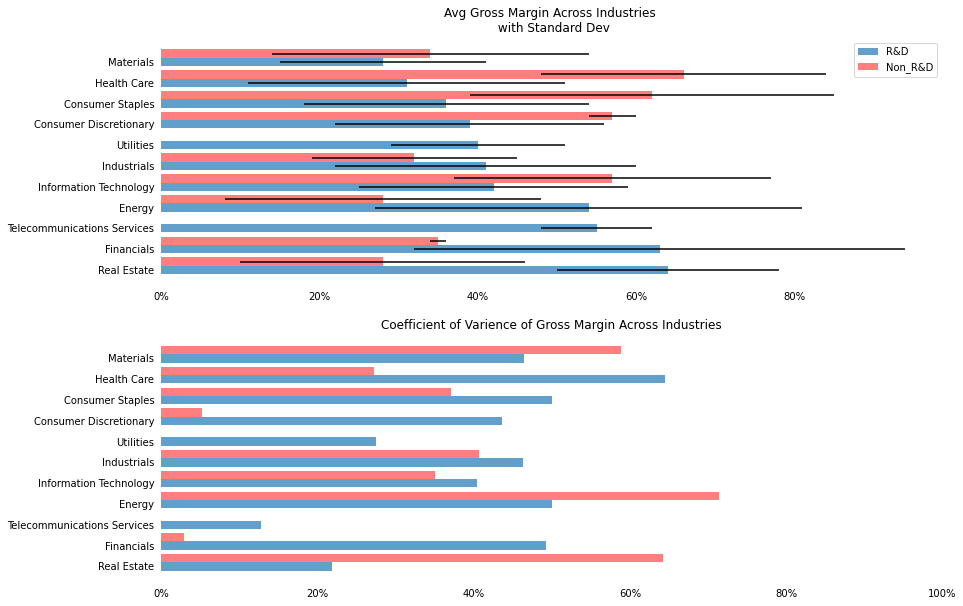

In [84]:
## Creating Bar Chart of Mean of GRoss Margin with the STD of Two Transformation Dataset
## For Comparing REason, Reletive measure of Spread is given as well, to get a better insight

plt.figure(figsize=(14,10))
#plt.subplot(121)
#plt.subplots()
yval = [x for x in range(len(data))]


# make a plot with the bar of mean and std
ax1=plt.subplot(211)
yval2 = [x+0.4 for x in range(len(data))]
_= ax1.barh(y = yval ,width=data["nanmean_r&d"],
         xerr=data["nanstd_r&d"], height=.4, alpha = .7,
        tick_label=[x for x in data.index],
          label="R&D")
plt.title("Avg Gross Margin Across Industries \n with Standard Dev")

_=ax1.barh(y = yval2 ,width=data["nanmean_non_r&d"], xerr=data["nanstd_non_r&d"],
         height=.4, color="red", alpha=.5,
         linewidth=4, label="Non_R&D")

#Create CV plot on another Plot of CV ( coeffcient of varience)
ax2 = plt.subplot(212, sharex=ax1)
_=ax2.barh(y = yval ,width=data["nanstd_r&d"]/data["nanmean_r&d"],
        height=.4, alpha = .7,
         tick_label=[x for x in data.index],
          label="R&D")
plt.title("Coefficient of Varience of Gross Margin Across Industries")

_= ax2.barh(y = yval2 ,width=data["nanstd_non_r&d"] / data["nanmean_non_r&d"],
         height=.4, color="red", alpha=.5,
         linewidth=4, label="Non_R&D")

#ax1.title("Avg Gross Margin Across Industries \n with Standard Dev")

ax1.legend()

# dejunckify
#ax = plt.gca()
for ax in [ax1, ax2]:
    ax.tick_params(top=False, bottom=False, left=False, right=False, labelbottom=True, labelleft=True)
    plt.xticks(ticks=[ 0, 0.2, 0.4, 0.6, 0.8, 1], labels=["0%", "20%", "40%", "60%", "80%", "100%"])
    for spine in ax.spines.values():
        spine.set_visible(False)

    
# for spine in ax.spines.values():
#     spine.set_visible(False)

# plt.tick_params(top=False, bottom=False, left=False, right=False, labelbottom=True, labelleft=True)

# plt.xticks(ticks=[ 0, 0.2, 0.4, 0.6, 0.8, 1], labels=["0%", "20%", "40%", "60%", "80%", "100%"])

plt.savefig("Comparison btwn R&D and NON_R&D")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


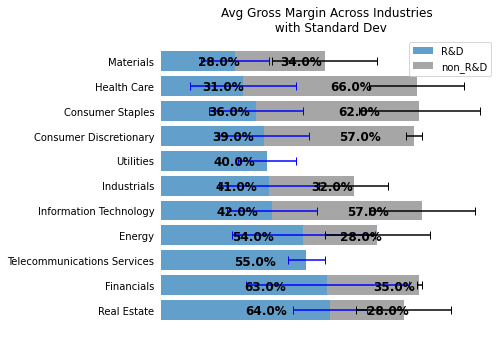

In [91]:
## Creating Bar Chart of Mean of GRoss Margin with the STD of Two Transformation Dataset
## For Comparing REason, Reletive measure of Spread is given as well, to get a better insight

plt.figure(figsize=(6,12))
#plt.subplot(121)
#plt.subplots()
yval = [x for x in range(len(data))]


# make a plot with the bar of mean and std
ax1=plt.subplot(211)
yval2 = [x+0.4 for x in range(len(data))]
_= ax1.barh(y = yval ,width=data["nanmean_r&d"], xerr=data['nanstd_r&d'],
          height=.8, alpha = .7,
        tick_label=[x for x in data.index], capsize=4,
          label="R&D", ecolor="blue")
## second plot
_= ax1.barh(y = yval ,width=data["nanmean_non_r&d"],
         left=data["nanmean_r&d"], height=.8, alpha = .7,
        tick_label=[x for x in data.index], xerr=data["nanstd_non_r&d"] ,
          label="non_R&D", capsize=4, color="grey")
plt.title("Avg Gross Margin Across Industries \n with Standard Dev")

# _=ax1.barh(y = yval2 ,width=data["nanmean_non_r&d"],
#          height=.4, color="green", alpha=.5,
#          linewidth=4, label="Non_R&D")

# _=ax1.barh(y = yval2 ,width=data["nanstd_non_r&d"], left=data["nanmean_non_r&d"],
#          height=.4, color="brown", alpha=.5,
#          linewidth=4, label="Non_R&D")

#Create CV plot on another Plot of CV ( coeffcient of varience)
# ax2 = plt.subplot(212, sharex=ax1)
# _=ax2.barh(y = yval ,width=data["nanstd_r&d"]/data["nanmean_r&d"],
#         height=.4, alpha = .7,
#          tick_label=[x for x in data.index],
#           label="R&D")
# plt.title("Coefficient of Varience of Gross Margin Across Industries")

# _= ax2.barh(y = yval2 ,width=data["nanstd_non_r&d"] / data["nanmean_non_r&d"],
#          height=.4, color="red", alpha=.5,
#          linewidth=4, label="Non_R&D")

#ax1.title("Avg Gross Margin Across Industries \n with Standard Dev")

ax1.legend()

# dejunckify
#ax = plt.gca()
for ax in [ax1, ax2]:
    ax.tick_params(top=False, bottom=False, left=False, right=False, labelbottom=False, labelleft=True)
    #plt.xticks(ticks=[ 0, 0.2, 0.4, 0.6, 0.8, 1], labels=["0%", "20%", "40%", "60%", "80%", "100%"])
    for spine in ax.spines.values():
        spine.set_visible(False)

    
for n, x in enumerate([*data.index.values]):
    for (proportion, y_loc) in zip(data[["nanmean_r&d", "nanmean_non_r&d"]].loc[x],
                                   data[["nanmean_r&d", "nanmean_non_r&d"]].loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + float((proportion / 2)),
                 y=n - 0.17,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.savefig("final_Comparison btwn R&D and NON_R&D")
plt.show()


In [65]:
for n, x in enumerate([*data.index.values]):
    for (proportion, y_loc) in zip(data[["nanmean_r&d", "nanmean_non_r&d"]].loc[x],
                                       data[["nanmean_r&d", "nanmean_non_r&d"]].loc[x].cumsum()):
        print(f'n : {n}, x: {x}, proportion: {proportion}, y_loc: {y_loc}, type_yloc:{type(y_loc)}, t_por: {type(proportion)}')

n : 0, x: Real Estate, proportion: 0.64, y_loc: 0.64, type_yloc:<class 'float'>, t_por: <class 'float'>
n : 0, x: Real Estate, proportion: 0.28, y_loc: 0.92, type_yloc:<class 'float'>, t_por: <class 'float'>
n : 1, x: Financials, proportion: 0.63, y_loc: 0.63, type_yloc:<class 'float'>, t_por: <class 'float'>
n : 1, x: Financials, proportion: 0.35, y_loc: 0.98, type_yloc:<class 'float'>, t_por: <class 'float'>
n : 2, x: Telecommunications Services, proportion: 0.55, y_loc: 0.55, type_yloc:<class 'float'>, t_por: <class 'float'>
n : 2, x: Telecommunications Services, proportion: nan, y_loc: nan, type_yloc:<class 'float'>, t_por: <class 'float'>
n : 3, x: Energy, proportion: 0.54, y_loc: 0.54, type_yloc:<class 'float'>, t_por: <class 'float'>
n : 3, x: Energy, proportion: 0.28, y_loc: 0.8200000000000001, type_yloc:<class 'float'>, t_por: <class 'float'>
n : 4, x: Information Technology, proportion: 0.42, y_loc: 0.42, type_yloc:<class 'float'>, t_por: <class 'float'>
n : 4, x: Information

In [53]:
list(zip(data[["nanmean_r&d", "nanmean_non_r&d"]].loc[x],
                                       data[["nanmean_r&d", "nanmean_non_r&d"]].loc[x].cumsum()))

[(0.28, 0.28), (0.34, 0.6200000000000001)]

In [48]:
data[["nanmean_r&d", "nanmean_non_r&d"]].loc

,nanmean_r&d,nanmean_non_r&d
GICS Sector,,
Real Estate,0.64,0.28
Financials,0.63,0.35
Telecommunications Services,0.55,NaN
Energy,0.54,0.28
Information Technology,0.42,0.57
Industrials,0.41,0.32
Utilities,0.40,NaN
Consumer Discretionary,0.39,0.57
Consumer Staples,0.36,0.62


In [59]:
for n, x in enumerate([*data.index.values]):
    print(f'n: {n}, x: {x}')
    print(type(n))

n: 0, x: Real Estate
<class 'int'>
n: 1, x: Financials
<class 'int'>
n: 2, x: Telecommunications Services
<class 'int'>
n: 3, x: Energy
<class 'int'>
n: 4, x: Information Technology
<class 'int'>
n: 5, x: Industrials
<class 'int'>
n: 6, x: Utilities
<class 'int'>
n: 7, x: Consumer Discretionary
<class 'int'>
n: 8, x: Consumer Staples
<class 'int'>
n: 9, x: Health Care
<class 'int'>
n: 10, x: Materials
<class 'int'>


In [35]:
for n, x in enumerate([*data.index.values]):
    for proportion in data["nanmean_r&d"].loc[x]:
        print(f'n: {n}, x: {x}, proportion: {proportion}')

TypeError: 'numpy.float64' object is not iterable

## BOX PLOT for the Summery of Whole Data


C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:471: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  artist_dict = ax.boxplot(box_data,
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:471: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  artist_dict = ax.boxplot(box_data,
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:471: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  artist_dict = ax.boxplot(box_data,
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:471: MatplotlibDeprecationWarning: Setting whis to 'rang

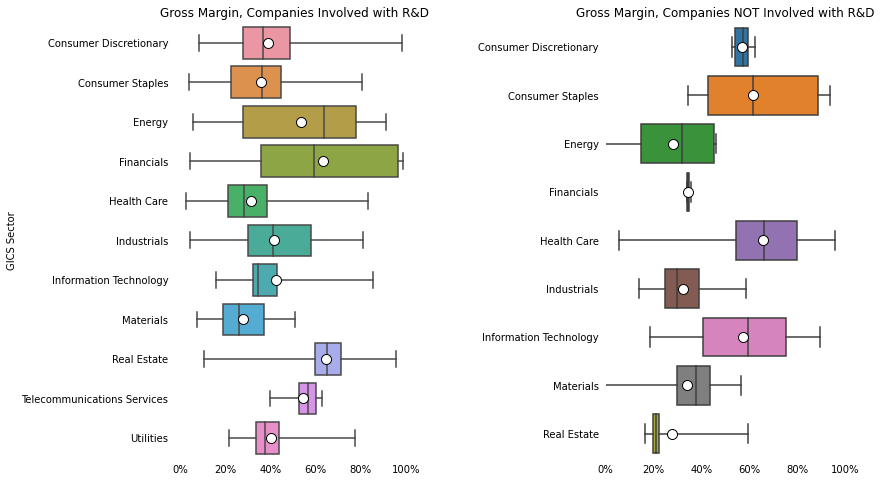

In [23]:
# save the file
import seaborn as sns
plt.figure(figsize=(12,8) )
plt.title("A")

#plot one box for ploting the research Dataset
ax1 = plt.subplot(121, ymargin=5)
_=sns.boxplot(x="Gross Margin", y="GICS Sector", 
            data=research, order=research["GICS Sector"].sort_values().unique(),
           showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, whis="range")
plt.title("Gross Margin, Companies Involved with R&D")
plt.xlabel("")
plt.xticks(ticks=[ 0, 0.2, 0.4, 0.6, 0.8, 1], labels=["0%", "20%", "40%", "60%", "80%", "100%"])

#plot other for non_research
ax2 =plt.subplot(122, )

# For Presentation reason, some of the Negetive outlier of NOn_reseach Dataset's Plot, has been ignored!
ax2.axis([0,1, 0,9])
_ = sns.boxplot(x="Gross Margin", y="GICS Sector", data=non_res,
            order=non_res["GICS Sector"].sort_values().unique(),
           showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, whis="range")

plt.title("Gross Margin, Companies NOT Involved with R&D")
plt.xlabel("")
plt.xticks(ticks=[ 0, 0.2, 0.4, 0.6, 0.8, 1], labels=["0%", "20%", "40%", "60%", "80%", "100%"])
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_visible(False)
        
for ax in [ax1, ax2]:
    ax.tick_params(left=False, bottom=False)

plt.ylabel("")
plt.subplots_adjust(wspace=.8)
    
plt.savefig("Box Plot Cmp on R&D and NON-R&D")



In [108]:
re_ana.to_excel(excel_writer="projectdata-nyse1 (version 1).xlsx", sheet_name="re_ana_stat", na_rep=0)

In [41]:
d = pd.

,nanmean,nanstd
,T_REV,T_REV
GICS Sector,,
Consumer Discretionary,3.491789e+09,7.940893e+08
Consumer Staples,4.738897e+09,2.492060e+09
Energy,1.054844e+10,9.222009e+09
Financials,2.375487e+09,1.117816e+08
Health Care,1.467500e+10,2.810786e+10
Industrials,2.874137e+10,2.426537e+10
Information Technology,1.834427e+10,3.542212e+10
Materials,1.377412e+10,1.111258e+10


In [117]:
# df2 = (df1.groupby(["GICS Sector", "Years"]).agg({"T_REV" : (np.nanmean, np.nanstd, lambda x : np.quantile(x, .25),
#                                lambda x: np.quantile(x, .75)),
#                                "R&D" : (np.nanmean, np.nanstd)})
#                                 .rename(level=1, columns={"nanmean": "avg", "nanstd": "std", "<lambda_0>": "Q1",
#                                                           "<lambda_1>": "Q3","nanmean": "mean","nanstd" : "std"}).unstack())

# df2

T_REV                              \
                                     mean                               
Years                              Year 1        Year 2        Year 3   
GICS Sector                                                             
Consumer Discretionary       1.696931e+10  1.765593e+10  1.861914e+10   
Consumer Staples             4.208490e+10  4.328870e+10  4.404293e+10   
Energy                       4.362911e+10  4.406593e+10  4.102777e+10   
Financials                   2.141921e+10  2.057056e+10  2.074421e+10   
Health Care                  2.007945e+10  2.165296e+10  2.491877e+10   
Industrials                  1.630318e+10  1.660086e+10  1.673671e+10   
Information Technology       1.554694e+10  1.539141e+10  1.676320e+10   
Materials                    1.188432e+10  1.214813e+10  1.231454e+10   
Real Estate                  2.115779e+09  2.375729e+09  2.679732e+09   
Telecommunications Services  5.460877e+10  5.569440e+10  5.782120e+10   
Utilities                    1.050740e+10  1.104025e+10  1.161481e+10   

                                                                       \
                                                    std                 
Years                              Year 4        Year 1        Year 2   
GICS Sector                                                             
Consumer Discretionary       2.005068e+10  2.707616e+10  2.737234e+10   
Consumer Staples             4.421518e+10  8.403153e+10  8.577752e+10   
Energy                       2.721637e+10  9.321548e+10  8.759869e+10   
Financials                   2.056838e+10  2.827223e+10  2.661686e+10   
Health Care                  2.731223e+10  3.069542e+10  3.376143e+10   
Industrials                  1.654992e+10  1.744693e+10  1.763647e+10   
Information Technology       1.603503e+10  3.087572e+10  2.977916e+10   
Materials                    1.095440e+10  9.732188e+09  9.689481e+09   
Real Estate                  2.875623e+09  1.683460e+09  1.872814e+09   
Telecommunications Services  6.202520e+10  6.154791e+10  6.322580e+10   
Utilities                    1.138025e+10  5.535680e+09  6.203885e+09   

                                                                     \
                                                                 Q1   
Years                              Year 3        Year 4      Year 1   
GICS Sector                                                           
Consumer Discretionary       2.827947e+10  3.097815e+10  5154284000   
Consumer Staples             8.780414e+10  8.824356e+10  5533000000   
Energy                       8.192470e+10  5.367206e+10  3998088500   
Financials                   2.611311e+10  2.558817e+10  3589516000   
Health Care                  4.064511e+10  4.506708e+10  2806136000   
Industrials                  1.793057e+10  1.779906e+10  4245912250   
Information Technology       3.539995e+10  3.291581e+10  2753890500   
Materials                    9.796729e+09  7.637863e+09  6043875000   
Real Estate                  2.100436e+09  2.314900e+09   794409000   
Telecommunications Services  6.589507e+10  7.081304e+10  6376000000   
Utilities                    6.602987e+09  6.820497e+09  6150590250   

                                         ...                              \
                                         ...            Q3                 
Years                            Year 2  ...        Year 3        Year 4   
GICS Sector                              ...                               
Consumer Discretionary       5607000000  ...   16435000000   17296750000   
Consumer Staples             5514000000  ...   45998000000   44294000000   
Energy                       4415484000  ...   22282500000   13907500000   
Financials                   3494253000  ...   22728000000   20872000000   
Health Care                  2917989250  ...   20954500000   22925000000   
Industrials                  4319136500  ...   21314750000   20528575000   
Information Techno

## Now all just a test


<BarContainer object of 11 artists>

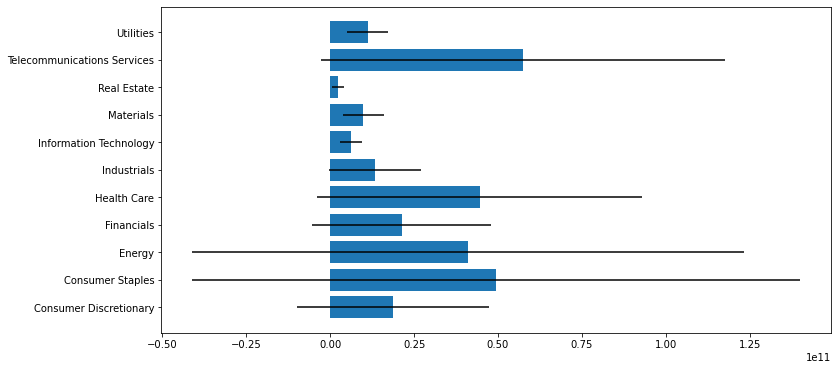

In [42]:
plt.figure(figsize=(12,6))
plt.barh(y = re_ana.index ,width=re_ana["nanmean"]["T_REV"], xerr=re_ana.nanstd["T_REV"] )

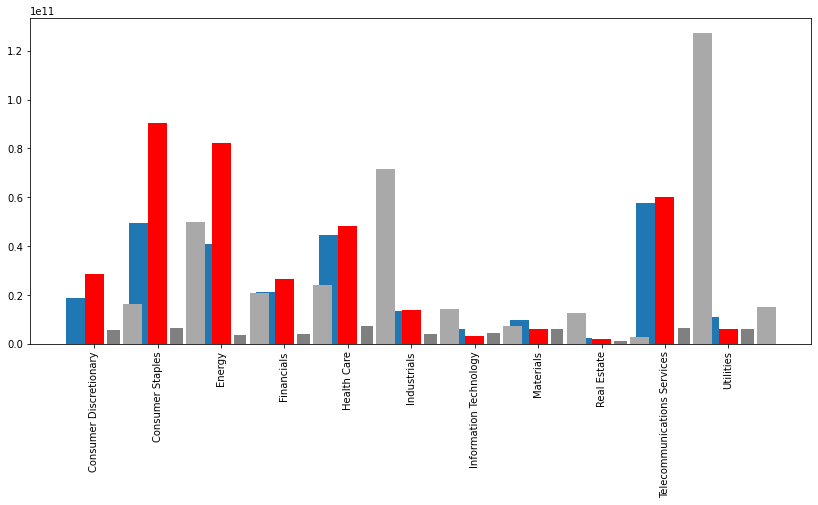

In [52]:
plt.figure(figsize=(14,6))
yval = [x for x in range(len(re_ana.nanmean))]

yval2 = [x+0.3 for x in yval]

plt.bar(yval, re_ana.nanmean['T_REV'], width=.3)
plt.bar(yval2, re_ana.nanstd['T_REV'],width=.3, color='red')

yval3 = [x+.3 for x in yval2]
plt.bar(yval3, re_ana.q1['T_REV'],width=.2, color='grey')

yval4 = [x+.3 for x in yval3]
plt.bar(yval4, re_ana.q3['T_REV'], width=.3, color='darkgrey')

plt.xticks(yval2, re_ana.index)

for child in plt.gca().xaxis.get_ticklabels():
    child.set_rotation(90)

In [87]:
research.head()

,Unnamed: 0,Ticker Symbol,Years,Period Ending,T_REV,COGS,ADM_cost,R&D,Other_opt,GICS Sector,GICS Sub Industry,Research_Boolean,Other_Opt_Boolean
0,0,AAL,Year 1,2012-12-31,24855000000,1.049900e+10,1.297700e+10,NaN,8.450000e+08,Industrials,Airlines,0,1
1,1,AAL,Year 2,2013-12-31,26743000000,1.101900e+10,1.291300e+10,NaN,8.530000e+08,Industrials,Airlines,0,1
2,2,AAL,Year 3,2014-12-31,42650000000,1.562000e+10,2.068600e+10,NaN,1.295000e+09,Industrials,Airlines,0,1
3,3,AAL,Year 4,2015-12-31,40990000000,1.109600e+10,2.127500e+10,NaN,1.364000e+09,Industrials,Airlines,0,1
4,4,AAP,Year 1,2012-12-29,6205003000,3.106967e+09,2.440721e+09,NaN,NaN,Consumer Discretionary,Automotive Retail,0,0


Text(0.5, 1.0, 'Sector - Wise Discriptive Summery of Total Revenue!')

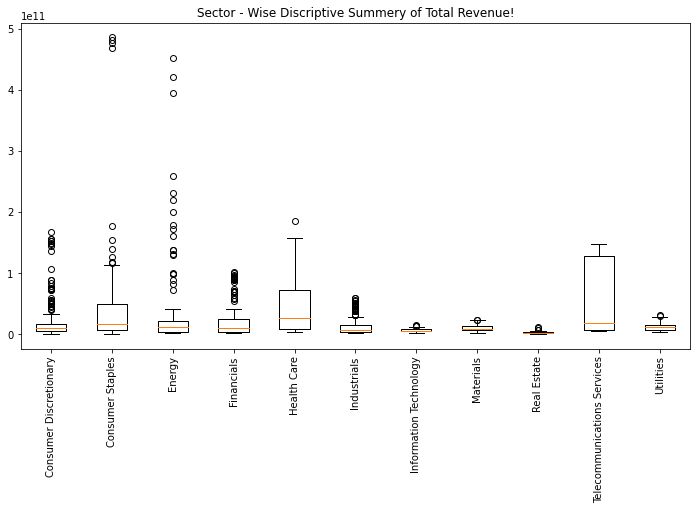

In [107]:
dummy = pd.DataFrame({x : research[research["GICS Sector"] == x]["T_REV"] for x in re_ana.index})

plt.figure(figsize=(12,6))


_=plt.boxplot(x=[dummy[~dummy[x].isnull()][x] for x in dummy.columns])

_=plt.xticks(range(1,12), [x for x in dummy.columns])

for child in plt.gca().xaxis.get_ticklabels():
    child.set_rotation(90)
plt.title("Sector - Wise Discriptive Summery of Total Revenue!")

Text(0.5, 1.0, 'Sector - Wise Discriptive Summery of Gross Margin!')

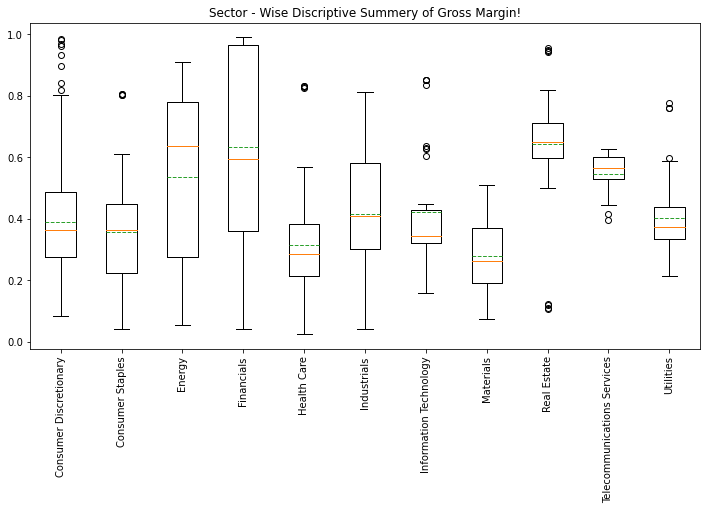

In [145]:
dummy = pd.DataFrame({x : research[research["GICS Sector"] == x]["Gross Margin"] for x in re_ana.index})

dummy2 = pd.DataFrame({x : non_res[non_res["GICS Sector"] == x]["Gross Margin"] for x in non_re_ana.index})

plt.figure(figsize=(12,6))


_=plt.boxplot(x=[dummy[~dummy[x].isnull()][x] for x in dummy.columns], meanline=True, showmeans=True)


_=plt.xticks(range(1,12), [x for x in dummy.columns])

for child in plt.gca().xaxis.get_ticklabels():
    child.set_rotation(90)
plt.title("Sector - Wise Discriptive Summery of Gross Margin!")

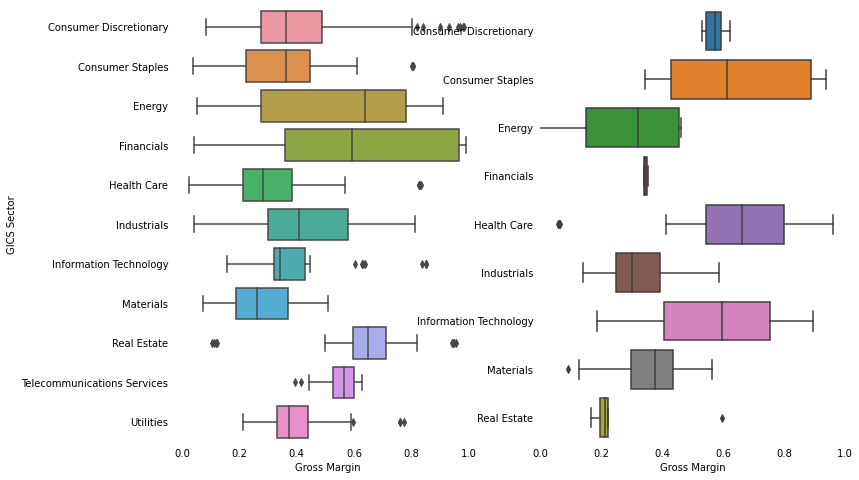

In [148]:
import seaborn as sns
plt.figure(figsize=(12,8) )
plt.title("A")

#plot one box
ax1 = plt.subplot(121)
sns.boxplot(x="Gross Margin", y="GICS Sector", 
            data=research, order=research["GICS Sector"].sort_values().unique())
#plt.title("A")
#plot other
ax2 =plt.subplot(122)
ax2.axis([0,1, 0,9])
sns.boxplot(x="Gross Margin", y="GICS Sector", data=non_res,
            order=non_res["GICS Sector"].sort_values().unique())

for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_visible(False)
        
for ax in [ax1, ax2]:
    ax.tick_params(left=False, bottom=False)

plt.ylabel("")
    
plt.savefig("Box Plot Cmp on R&D and NON-R&D")

In [70]:
plt.figure()
research

,Unnamed: 0,Ticker Symbol,Years,Period Ending,T_REV,COGS,ADM_cost,R&D,Other_opt,GICS Sector,GICS Sub Industry,Research_Boolean,Other_Opt_Boolean,Gross Margin
0,0,AAL,Year 1,2012-12-31,24855000000,1.049900e+10,1.297700e+10,NaN,8.450000e+08,Industrials,Airlines,0,1,0.577590
1,1,AAL,Year 2,2013-12-31,26743000000,1.101900e+10,1.291300e+10,NaN,8.530000e+08,Industrials,Airlines,0,1,0.587967
2,2,AAL,Year 3,2014-12-31,42650000000,1.562000e+10,2.068600e+10,NaN,1.295000e+09,Industrials,Airlines,0,1,0.633763
3,3,AAL,Year 4,2015-12-31,40990000000,1.109600e+10,2.127500e+10,NaN,1.364000e+09,Industrials,Airlines,0,1,0.729300
4,4,AAP,Year 1,2012-12-29,6205003000,3.106967e+09,2.440721e+09,NaN,NaN,Consumer Discretionary,Automotive Retail,0,0,0.499280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,1768,YUM,Year 4,2015-12-26,13105000000,9.359000e+09,1.746000e+09,NaN,NaN,Consumer Discretionary,Restaurants,0,0,0.285845
1702,1773,ZION,Year 1,2012-12-31,2458592000,8.014600e+07,1.579007e+09,NaN,3.123700e+07,Financials,Regional Banks,0,1,0.967402
1703,1774,ZION,Year 2,2013-12-31,2278812000,5.891300e+07,1.700064e+09,NaN,-7.276100e+07,Financials,Regional Banks,0,1,0.974147
1704,1775,ZION,Year 3,2014-12-31,2361631000,4.973600e+07,1.654369e+09,NaN,-8.715900e+07,Financials,Regional Banks,0,1,0.978940


<Figure size 432x288 with 0 Axes>

In [99]:
tick

['Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Financials',
 'Health Care',
 'Industrials',
 'Information Technology',
 'Materials',
 'Real Estate',
 'Telecommunications Services',
 'Utilities']